In [ ]:
# Import libraries and standardize path
import os
from pathlib import Path
import numpy as np
import cv2
from tkinter.filedialog import askopenfilename

Current working directory: D:\Users\Jacks\Desktop\Jackson's Homework\Year 4\BMEG 457\MRI-TO-PCT\Capstone Code and resources


In [ ]:
current_directory = os.getcwd()
print(f"Current working directory: {current_directory}")
# Change directory as needed
#os.chdir("D:/Users/Jacks/Desktop/Jackson's Homework/Year 4/BMEG 457/MRI-TO-PCT/Capstone Code and resources")

In [ ]:
# Section for inverse log scaling
image_path = "Images/chicken screenshot.png" # Change as needed

image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
if image is None:
    raise FileNotFoundError(f"Image at path '{image_path}' could not be loaded. Check the file path.")

image_float = np.float32(image)

log_image = np.log(image_float + 1) # Avoids log(0)
log_image = np.uint8(255 * log_image / np.max(log_image)) # Normalization from [0 - 1] within rescaling

inverse_log_image = 255 - log_image  
cv2.imwrite('inverse_log_scaled_image.png', inverse_log_image) # Change as needed to avoid overwrite

True

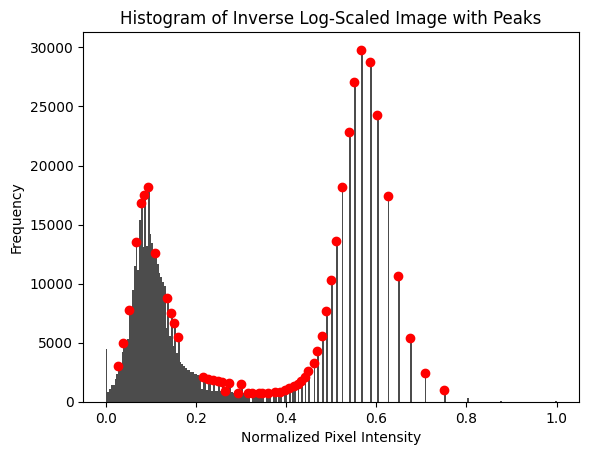

Thresholds for Peaks: [0.02734375 0.0390625  0.05078125 0.06640625 0.078125   0.0859375
 0.09375    0.109375   0.13671875 0.14453125 0.15234375 0.16015625
 0.21484375 0.2265625  0.23828125 0.25       0.2578125  0.265625
 0.2734375  0.29296875 0.30078125 0.31640625 0.32421875 0.33984375
 0.34765625 0.359375   0.375      0.38671875 0.3984375  0.40625
 0.41796875 0.42578125 0.43359375 0.44140625 0.44921875 0.4609375
 0.46875    0.48046875 0.48828125 0.5        0.51171875 0.5234375
 0.5390625  0.55078125 0.56640625 0.5859375  0.6015625  0.625
 0.6484375  0.67578125 0.70703125 0.75      ]


In [19]:
# Section for Histogram and Thresholding
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

inv_norm = inverse_log_image / 255.0

hist, bins = np.histogram(inv_norm.ravel(), bins=256, range=(0, 1))

#Change height to identify peaks 
peaks, _ = find_peaks(hist, height=700)

# Threshold values
thresholds = bins[peaks]

plt.hist(inv_norm.ravel(), bins=256, range=(0, 1), color='black', alpha=0.7)
plt.scatter(thresholds, hist[peaks], color='red', zorder=5)

plt.title('Histogram of Inverse Log-Scaled Image with Peaks')
plt.xlabel('Normalized Pixel Intensity')
plt.ylabel('Frequency')

plt.show()

print('Thresholds for Peaks:', thresholds)

In [ ]:
# TODO: Section for Segmentation based on Previous Thresholds